DATASET/UNICODE.tar.gz
DATASET/Y_original.npy
DATASET/X_train_img.npy
DATASET/Y_train_one_hot.npy
DATASET/X_original.npy
DATASET/Y_test_one_hot.npy
DATASET/X_test_img.npy
DATASET/BB_original.npy
(5820, 70, 70)
(5820, 70, 70)
(97, 70, 70)
(5820, 97)
(97,)


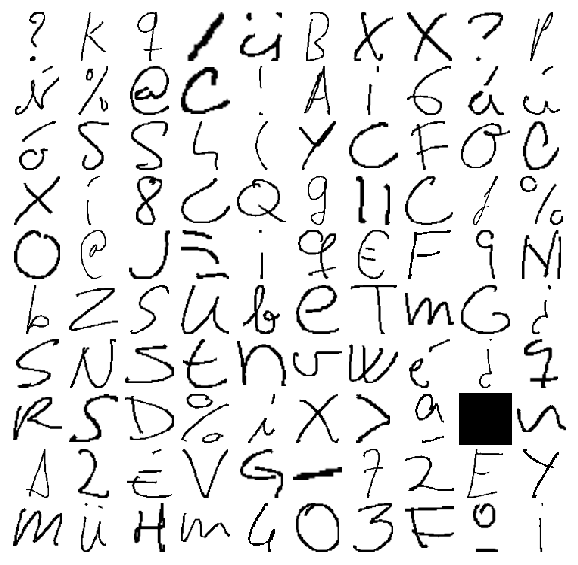

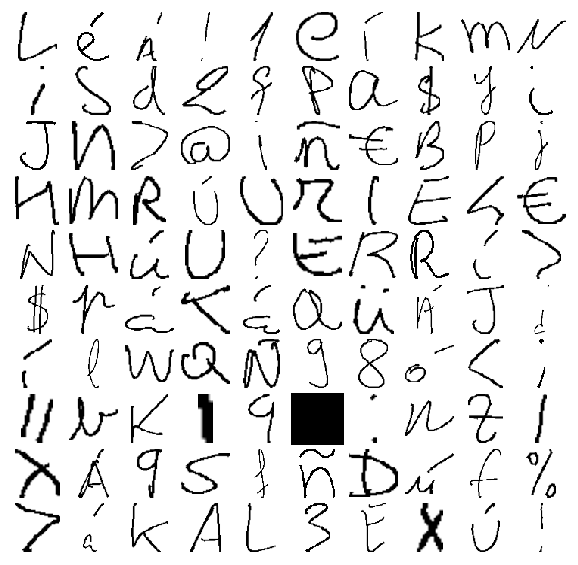

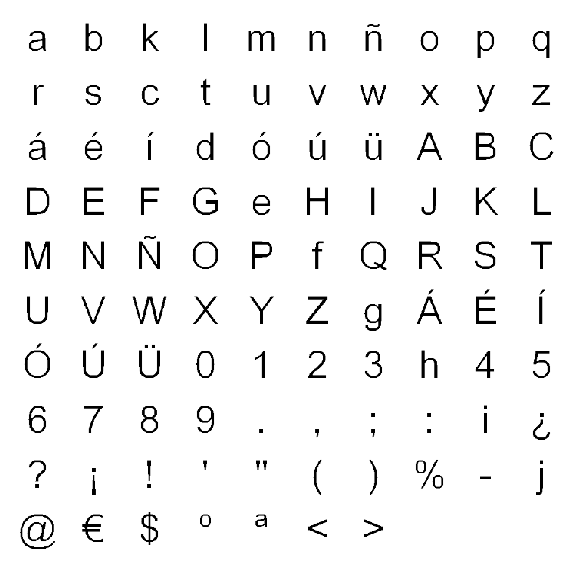

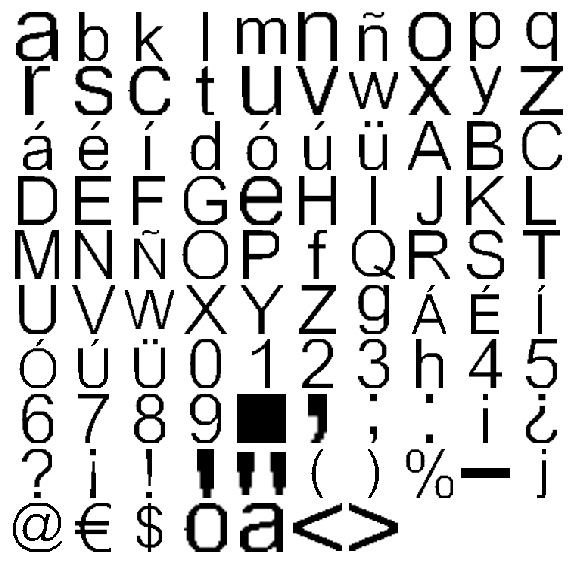

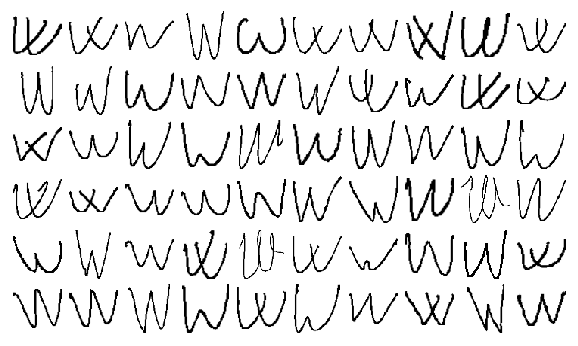

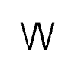

In [1]:
#
# COMMENTS TO DO
#

%matplotlib inline
import tensorflow as tf
import tensorflow.contrib.layers as layers
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import os
import time
import glob

from tensorflow.examples.tutorials.mnist import input_data

def plot(samples, w, h, fw, fh, iw=28, ih=28):
    fig = plt.figure(figsize=(fw, fh))
    gs = gridspec.GridSpec(w, h)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(iw, ih), cmap='Greys_r')

    return fig

DATA_PATH = "DATASET/"

file_list = glob.glob(DATA_PATH + "*")

print("\n".join(file_list))

# lista de imágenes de 70x70 escritas a mano para el entrenamiento
X_train_img = np.load(DATA_PATH + "X_train_img.npy")
# lista de etiquetas en formato one-hot vector de las imágenes anteriores
Y_train_one_hot = np.load(DATA_PATH + "Y_train_one_hot.npy")

#  lo mismo para el caso del test
X_test_img  = np.load(DATA_PATH + "X_test_img.npy")
Y_test_one_hot = np.load(DATA_PATH + "Y_test_one_hot.npy")


#  imágenes de los caracteres escritos a ordenador de tamaño 70x70
X_original = np.load(DATA_PATH + "X_original.npy")
# las mismas imágenes pero extraídas con un bounding box de la misma forma que las imágenes de train/test
BB_original  = np.load(DATA_PATH + "BB_original.npy")
#  las etiquetas correspondientes a cada imagen
Y_original = np.load(DATA_PATH + "Y_original.npy")

print(X_train_img.shape)
print(X_test_img.shape)
print(BB_original.shape)
print(Y_train_one_hot.shape)

print(Y_original.shape)

fig=plot(X_train_img[:100], 10, 10, 10, 10, 70, 70)
plt.show()

fig=plot(X_test_img[:100], 10, 10, 10, 10, 70, 70)
plt.show()

fig=plot(X_original[:100], 10, 10, 10, 10, 70, 70)
plt.show()

fig=plot(BB_original[:100], 10, 10, 10, 10, 70, 70)
plt.show()

label = 56

indexes = np.where(Y_train_one_hot[:,label] == 1)
fig=plot(X_train_img[indexes[0][:100]], 10, 10, 10, 10, 70, 70)
plt.show()

indexes = np.where(Y_original == label)
fig=plot(X_original[indexes[0][:100]], 10, 10, 10, 10, 70, 70)
plt.show()